In [7]:
from pathlib import Path  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib

warnings.filterwarnings("ignore")

Načtení dat z url

In [8]:
df = pd.read_csv("https://query.data.world/s/3aahdv5my2weqdqewg6rqsiccft2fq")
df.head(3)


,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2/24/18,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2/24/18,Closed with explanation,Yes,NaN
1,1515991,8/12/15,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,8/12/15,Closed with explanation,Yes,No
2,1145261,12/5/14,Bank account or service,Checking account,Deposits and withdrawals,"""""",NaN,Cumulus Financial,CA,91792,NaN,NaN,Referral,12/8/14,Closed with explanation,Yes,No


Sloupce

In [9]:
df.columns


Index(['Complaint ID', 'Date Sumbited', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Company public response', 'Company', 'State', 'ZIP code',
       'Tags', 'Consumer consent provided?', 'Submitted via', 'Date Received',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

Kontrola datových sloupců

In [10]:
df.dtypes

Complaint ID                     int64
Date Sumbited                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date Received                   object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
dtype: object

Analýza NaN hodnot

In [11]:
nan_counts = df.isna().sum()
nan_counts_sorted = (
    nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name="counts")
)
nan_counts_sorted["percentage"] = (nan_counts_sorted.counts * 100) / df.shape[0]
nan_counts_sorted

,counts,percentage
Tags,66560,88.143763
Consumer consent provided?,52174,69.092739
Company public response,48178,63.800935
Consumer disputed?,36947,48.927999
ZIP code,4367,5.783110
State,2893,3.831128
Sub-issue,751,0.994531


Rozdělení sloupců na numerické a stringové

In [12]:
string_columns = df.dtypes.loc[df.dtypes == np.object].index.to_list()
numerical_columns = df.dtypes.loc[~(df.dtypes == np.object)].index.to_list()

In [13]:
df[numerical_columns].describe()

,Complaint ID
count,7.551300e+04
mean,2.073739e+06
std,1.198523e+06
min,1.000000e+00
25%,9.294040e+05
50%,2.383662e+06
75%,3.092298e+06
max,3.897741e+06


Analýza bez cíle pouze stringové sloupce, numercký sloupec je ID 

In [14]:
df[string_columns].describe()

,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
count,75513,75513,75513,75513,74762,27335,75513,72620,71146,8953,23339,75513,75513,75513,75513,38566
unique,3233,8,46,88,170,2,1,61,10884,2,4,6,3117,8,2,2
top,4/5/18,Credit card,"""""",Managing an account,"""""",Company has responded to the consumer and the ...,Cumulus Financial,CA,070XX,Older American,Consent not provided,Web,6/21/12,Closed with explanation,Yes,No
freq,123,19176,19176,8849,41539,25691,75513,12107,183,5577,16587,38036,139,54666,74044,31203


In [15]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75513 entries, 0 to 75512
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Complaint ID                  75513 non-null  int64 
 1   Date Sumbited                 75513 non-null  object
 2   Product                       75513 non-null  object
 3   Sub-product                   75513 non-null  object
 4   Issue                         75513 non-null  object
 5   Sub-issue                     74762 non-null  object
 6   Company public response       27335 non-null  object
 7   Company                       75513 non-null  object
 8   State                         72620 non-null  object
 9   ZIP code                      71146 non-null  object
 10  Tags                          8953 non-null   object
 11  Consumer consent provided?    23339 non-null  object
 12  Submitted via                 75513 non-null  object
 13  Date Received   

Analýza klíčového sloupce "Issue" - problém :-(    
Nejčastější problém "Managing an account" - Správa účtu

In [16]:
df.loc[:, "Issue"].describe()

count                   75513
unique                     88
top       Managing an account
freq                     8849
Name: Issue, dtype: object

Představa o target column "Issue" problém, pomocí seaborn histplot

<AxesSubplot: title={'center': 'Analysis of the financial consumer problem'}, xlabel='Count', ylabel='Issue'>

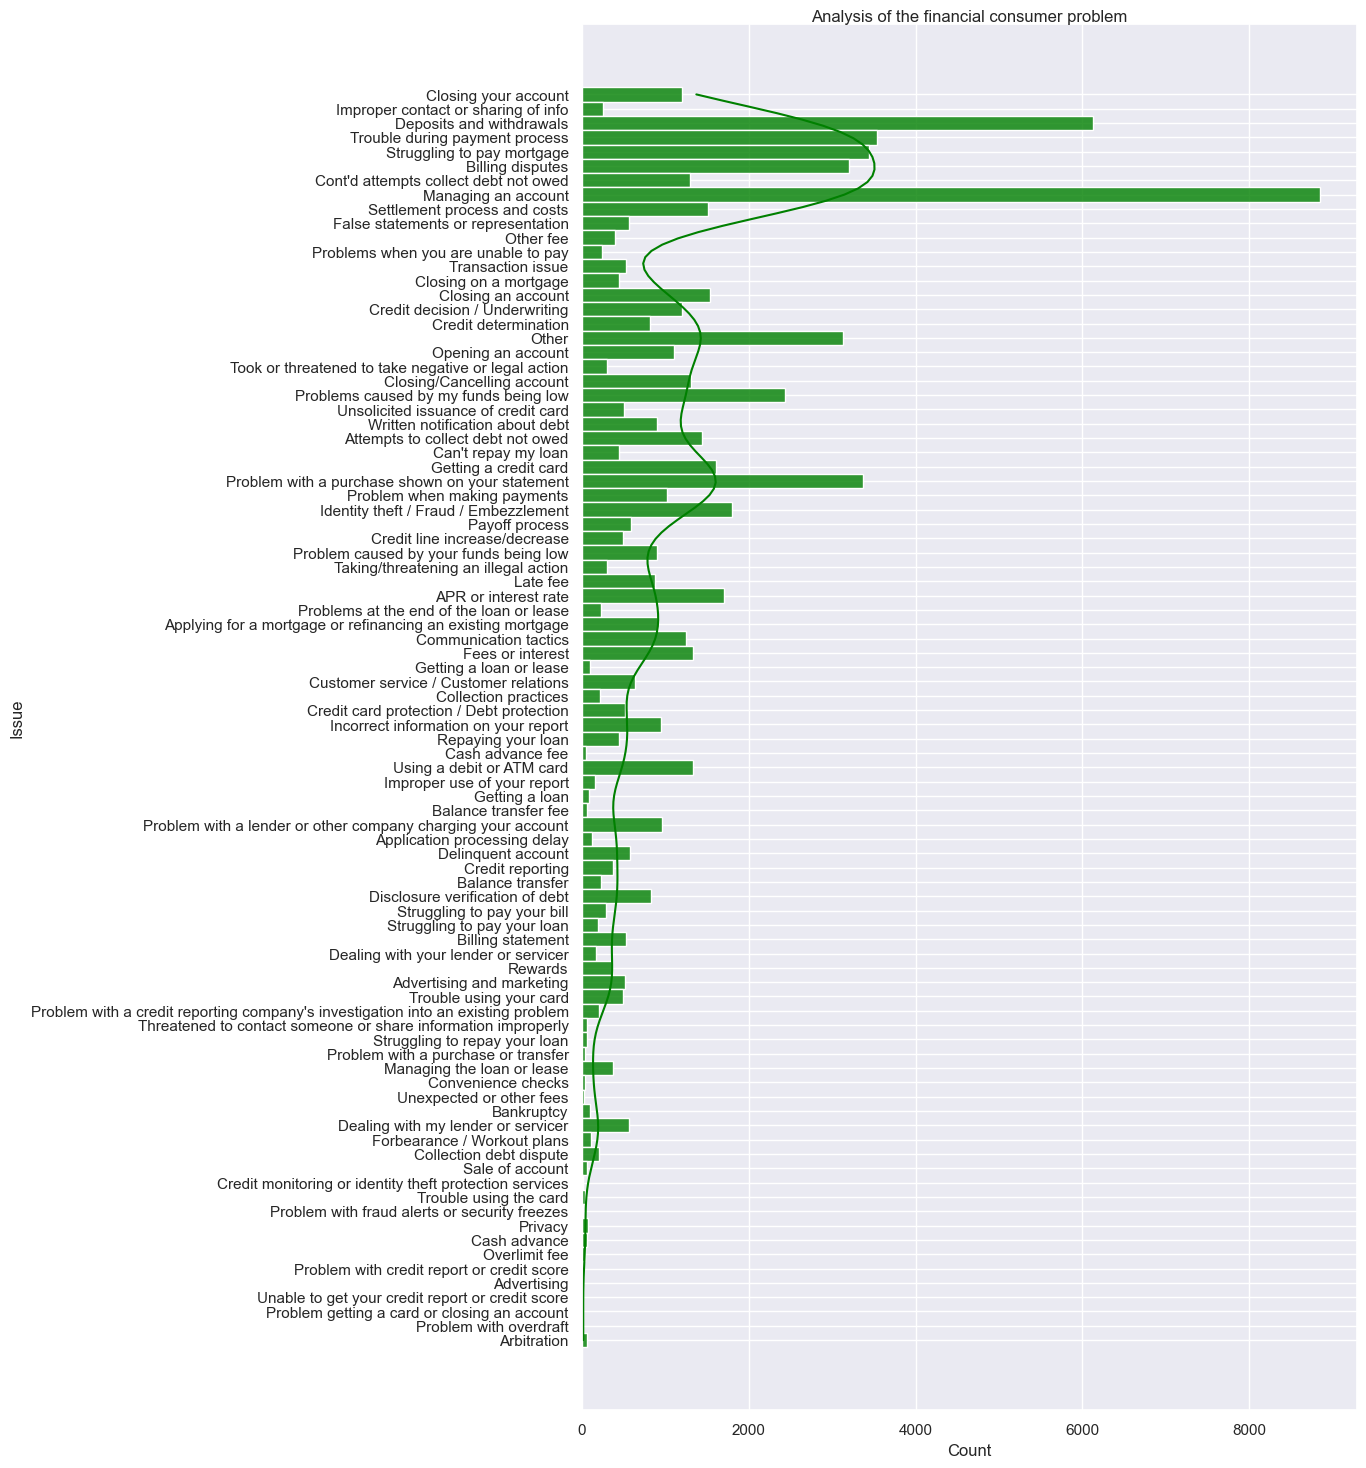

In [17]:
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(10, 18))
ax.set_title('Analysis of the financial consumer problem', pad=2)
sns.histplot(data=df, y="Issue", stat='count', color="green", alpha = 0.8, kde = True)

Zdá se, že nejvíce problémů  jsou s "Credit card"

Text(0.5, 1.0, 'Analysis of the problem with Financial Products')

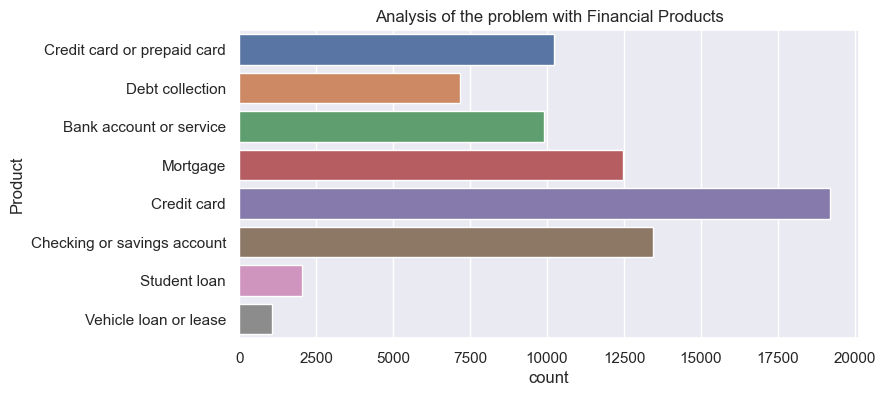

In [18]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.countplot(
    y="Product",
    data=df,
).set_title("Analysis of the problem with Financial Products")

In [19]:
string_columns

['Date Sumbited',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date Received',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?']

Nejvíce problému s finančními produkty jsou ve státě Kalifornie

Text(0.5, 1.0, 'The most common occurrence of the problem in the states of the USA')

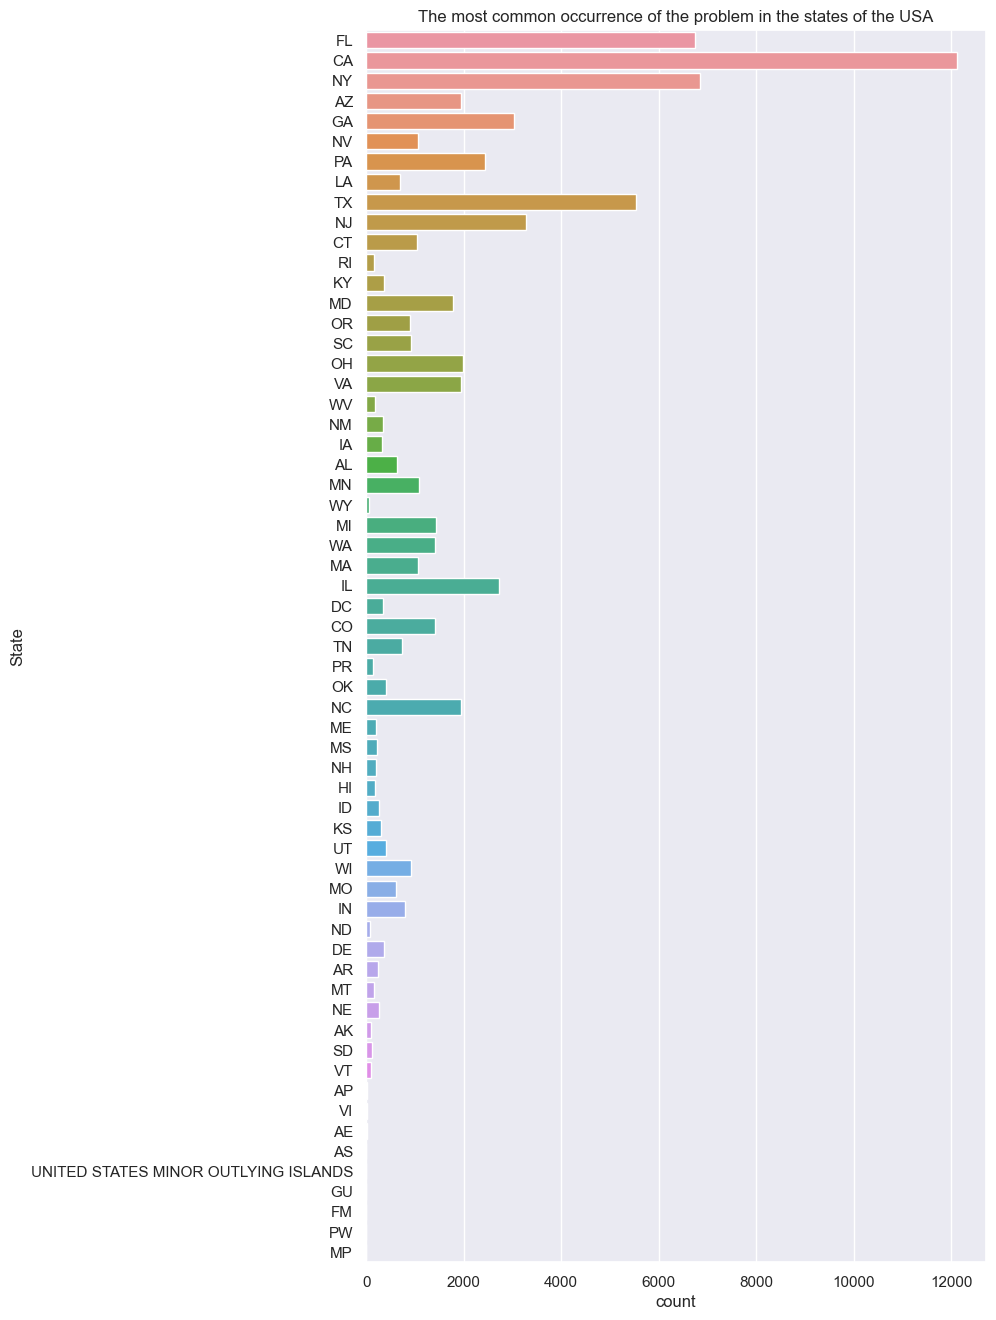

In [20]:
sns.set(rc={"figure.figsize":(8,16)})
sns.countplot( y="State", data=df, ).set_title("The most common occurrence of the problem in the states of the USA")

Přejmenování sloupců z důvodu uložení do CSV a poté import do PostgreSQL

In [21]:
df.columns

Index(['Complaint ID', 'Date Sumbited', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Company public response', 'Company', 'State', 'ZIP code',
       'Tags', 'Consumer consent provided?', 'Submitted via', 'Date Received',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [22]:
df = df.rename(
    columns={
        "Complaint ID": "Complaint_ID",
        "Date Sumbited": "Date_Sumbited",
        "Sub-product": "Sub_product",
        "Sub-issue": "Sub_issue",
        "Company public response":"Company_public_response",
        "ZIP code": "ZIP_code",
        "Consumer consent provided?":"Consumer_consent_provided",
        "Submitted via": "Submitted_via",
        "Date Received": "Date_Received",
        "Company response to consumer": "Company_response_to_consumer",
        "Timely response?": "Timely_response",
        "Consumer disputed?": "Consumer_disputed",
    }
)

In [23]:
df.columns

Index(['Complaint_ID', 'Date_Sumbited', 'Product', 'Sub_product', 'Issue',
       'Sub_issue', 'Company_public_response', 'Company', 'State', 'ZIP_code',
       'Tags', 'Consumer_consent_provided', 'Submitted_via', 'Date_Received',
       'Company_response_to_consumer', 'Timely_response', 'Consumer_disputed'],
      dtype='object')

Export datového rámce do složky s kodem ve formátu CSV

In [24]:

filepath = Path('C:/Users/Uzivatel/Desktop/financial_consumer_complaints.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=False)  
